In [3]:
import pandas
from matplotlib import pyplot

In [5]:
df = pandas.read_csv('sample.csv')

         x         y
0   40.362  137500.0
1   40.686  132500.0
2   38.430   93000.0
3   36.822   96500.0
4   37.002  100500.0
..     ...       ...
95  47.250  250000.0
96  43.722  166500.0
97  42.642  151500.0
98  43.644  173000.0
99  41.850  174500.0

[100 rows x 2 columns]


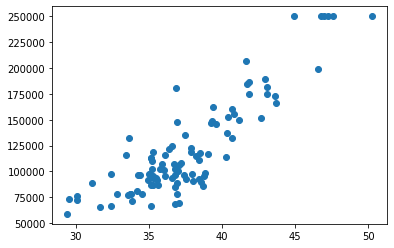

In [7]:
print(df)

x = df['x']
y = df['y']


# 散布図でプロット
pyplot.scatter(x, y)
pyplot.show()

In [8]:
# データの概要（平均値など）
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [12]:
# 中心化。Dtaframeから直接引き算できる
df_center = df - df.mean()

In [13]:
df_center.describe()

,x,y
count,1.000000e+02,100.000000
mean,2.096101e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


In [15]:
# データの抽出
x = df_center['x']
y = df_center['y']

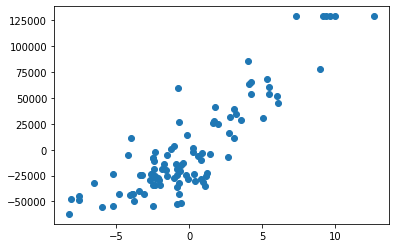

In [16]:
# 散布図でプロット
pyplot.scatter(x, y)
pyplot.show()

## パラメータaの計算

$$
  a = \frac{\sum_{n=1}^{N}x_ny_n}{\sum_{n=1}^{N}x^2_n}
$$

In [19]:
xx = x * x
xy = x * y

In [20]:
a = xy.sum() / xx.sum()

In [21]:
a

10069.022519284063

## プロットして確認
$$
  \hat{y} = ax
$$

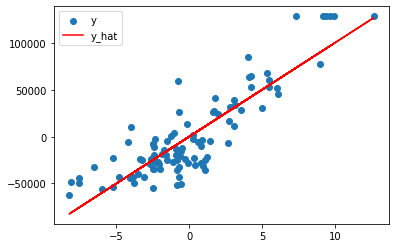

In [28]:
# 散布図でプロット
pyplot.scatter(x, y, label='y')  # 実測値
pyplot.plot(x, a*x, label='y_hat', color='red') # 予測値
pyplot.legend()  # 凡例の表示
pyplot.show()

## 予測値の計算
$$
  y - y^- = a(x - x^-) \\
  y = a(x - x^-) + y^-
$$

In [36]:
x_new = 40
x_center = x_new - df.mean()['x']

In [38]:
y_center = a * x_center

In [42]:
y_hat = y_center + df.mean()['y']

In [43]:
y_hat

145006.92036590326

## 予測値を計算する関数

In [48]:
def predict(x):
    # 定数項
    a = 10069.022519284063
    x_mean = 37.622199
    y_mean = 121065
    # 中心化
    x_center = x - x_mean
    y_hat = a * x_center + y_mean
    return y_hat

In [49]:
print(predict(40))

145007.13181537614
